# Visualize TIS_transformer results

In [1]:
import numpy as np
import pandas as pd
import os
from src.visualisation_utils import concat_chr_arrays, get_inference, roc_pr_auc, plot_distribution_graph, plot_bar_roc_pr_by_chromosomes, remove_long_sequences

%load_ext autoreload
%autoreload 2

First, we will look at chromosome 4

In [2]:
chr4_predictions = np.load('out/tis_chr4_version_0.npy', allow_pickle=True)
chr4=np.load('data/GRCh38p13_unzip/chr4.npy', allow_pickle=True)
chr4 = remove_long_sequences(chr4)
outputs,labels = concat_chr_arrays(chr4_predictions, chr4)
del chr4_predictions, chr4
outputs.shape, labels.shape

((16355057,), (1, 16355057))

In [3]:
TIS_number = labels.sum()
inference = get_inference(outputs, 3*TIS_number)
TIS_number, inference[0:5]

(3647, array([0., 0., 0., 0., 0.], dtype=float32))

In [4]:
roc, pr = roc_pr_auc(outputs, labels.A.flatten())
roc, pr

(0.9998106348859738, 0.8549431435101602)

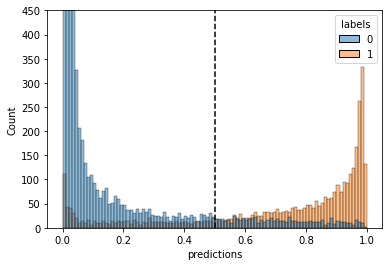

In [5]:
plot_distribution_graph(outputs, labels.A.flatten())

Now we are going to get results on all chromosomes

In [6]:
del outputs, labels, inference
OUT_DIR = "./out"

npy_files = os.listdir(OUT_DIR)
chr = [s.split('_')[1] for s in npy_files]
files = pd.DataFrame({'name': npy_files, 'chr':chr})
files.head()

,name,chr
0,tis_chr16_version_0.npy,chr16
1,tis_chr22_version_0.npy,chr22
2,tis_chrY_version_0.npy,chrY
3,tis_chr21_version_0.npy,chr21
4,tis_chr4_large_version_0.npy,chr4


In [7]:
roc_pr_df = pd.DataFrame(columns=["Model", "roc_auc", "pr_auc"])
count = 0
for chr_name, chr_df in files.groupby('chr'):
    print('\r', chr_name, ' ', end='')
    matrix = np.load(f'data/GRCh38p13_unzip/{chr_name}.npy', allow_pickle=True)
    chr = remove_long_sequences(matrix)
    for file in chr_df['name']:
        predictions = np.load('out/'+file, allow_pickle=True)
        outputs,labels = concat_chr_arrays(predictions, chr)
        del predictions
        #TIS_number = labels.sum()
        #inference = get_inference(outputs, 3*TIS_number)
        roc, pr = roc_pr_auc(outputs, labels.A.flatten())
        roc_pr_df.loc[count] = file, roc, pr
        count += 1
roc_pr_df     
        

 chrY   

,Model,roc_auc,pr_auc
0,tis_chr1_version_0.npy,0.999933,0.847866
1,tis_chr10_version_0.npy,0.999947,0.865847
2,tis_chr11_version_0.npy,0.999935,0.853333
3,tis_chr12_version_0.npy,0.999918,0.843575
4,tis_chr13_version_0.npy,0.999945,0.839617
5,tis_chr14_version_0.npy,0.999915,0.841236
6,tis_chr15_version_0.npy,0.999935,0.843112
7,tis_chr16_version_0.npy,0.999906,0.832248
8,tis_chr17_version_0.npy,0.999926,0.843384
9,tis_chr18_version_0.npy,0.999937,0.839170


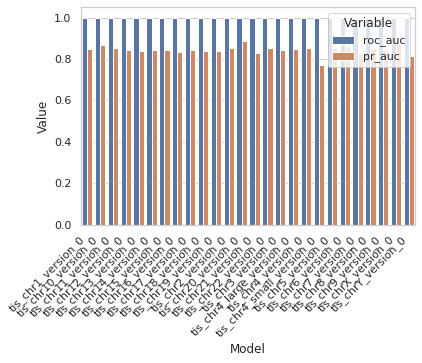

In [8]:
plot_bar_roc_pr_by_chromosomes(roc_pr_df)